In [14]:
!pip install -U imbalanced-learn

In [15]:
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0    99.827251
1     0.172749
Name: Class, dtype: float64


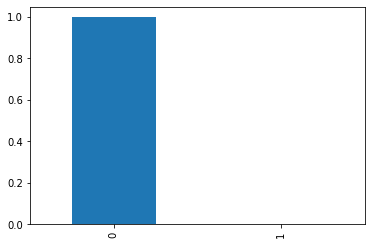

In [29]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/4-2/capstone2/creditcard.csv')
df.Class.value_counts(normalize=True).plot(kind='bar')
print(df.Class.value_counts(normalize=True)*100)
import numpy as np
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people()
george_bush_id = 1871  # Photos of George W. Bush
bill_clinton_id = 531  # Photos of Bill Clinton
classes = [george_bush_id, bill_clinton_id]
classes_name = np.array(["B. Clinton", "G.W. Bush"], dtype=np.object)
mask_photos = np.isin(data.target, classes)
X, y = data.data[mask_photos], data.target[mask_photos]
y = (y == george_bush_id).astype(np.int8)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from collections import Counter
from matplotlib import pyplot
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)
#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred, average='macro')
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.6f}, 정밀도 : {1:.6f}, 재현율 : {2:.6f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.6f}, auc : {1:.6f}'.format(f1,roc_score,recall))


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = LogisticRegression(max_iter=1000)
modeling(lr,X_train,X_test,y_train,y_test)

정확도 : 0.971429, 정밀도 : 0.977941, 재현율 : 0.992537
f1-score : 0.792593, auc : 0.746269


In [42]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
sm = SMOTE(random_state=25)
X_res, y_res = sm.fit_resample(X, y)
print(Counter(y_res))
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=10)
modeling(lr, X_train,X_test,y_train,y_test)

Counter({1: 530, 0: 530})
정확도 : 0.996226, 정밀도 : 1.000000, 재현율 : 0.992366
f1-score : 0.996226, auc : 0.996183


In [41]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
lr = LogisticRegression(max_iter=10000)
border_sm = BorderlineSMOTE(
    sampling_strategy=0.5, 
    random_state=32)
svm_sm = SVMSMOTE(random_state=43)
X_border_sm1, y_border_sm1 = border_sm.fit_resample(X, y)
X_border_sm2, y_border_sm2 = svm_sm.fit_resample(X_border_sm1, y_border_sm1)

X_train, X_test, y_train, y_test = train_test_split(X_border_sm2, y_border_sm2,test_size=0.25,random_state=10)
print('border_svm')
modeling(lr, X_train,X_test,y_train,y_test)



border_sm = BorderlineSMOTE(random_state=30)
svm_sm= SVMSMOTE(sampling_strategy=0.5, random_state=20)
X_res, y_res = svm_sm.fit_resample(X, y)
X_sm_border, y_sm_border = border_sm.fit_resample(X_res, y_res)

print('svm_border')
X_train, X_test, y_train, y_test = train_test_split(X_sm_border, y_sm_border,test_size=0.25,random_state=10)
modeling(lr, X_train,X_test,y_train,y_test)

border_svm
정확도 : 0.996226, 정밀도 : 1.000000, 재현율 : 0.992366
f1-score : 0.996226, auc : 0.996183
svm_border
정확도 : 0.992453, 정밀도 : 0.992366, 재현율 : 0.992366
f1-score : 0.992452, auc : 0.992452
